In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
pwd

'/home/gray/git_folders/DL/emotion_detection'

In [3]:
base_dir = '../dataset/KDEF_and_AKDEF/KDEF/'

In [4]:
import os

In [5]:
from keras.preprocessing import image

In [6]:
def read(filename):
    data = []
    file = open(filename, 'r')
    for line in file:
        data.append(line.replace('\n',''))
    file.close()
    return data

In [7]:
training_data = read('train.txt')
test_data = read('test.txt')
val_data = read('validation.txt')

In [8]:
len(training_data), len(test_data), len(val_data)

(2140, 500, 300)

In [9]:
import numpy as np

In [10]:
training_data[0]

'BF27/BF27SUS.JPG,6,4'

In [11]:
def seperate_description(data):
    path = [i.split(',')[0] for i in data]
    expression = [i.split(',')[1] for i in data]
    angle = [i.split(',')[2] for i in data]
    return path, expression, angle

In [12]:
expressions_dict = {
            "AF": 0, #Afraid
            "AN": 1, #Angry
            "DI": 2, #Disgust
            "HA": 3, #happy
            "NE": 4, #neutral
            "SA": 5, #Sad
            "SU": 6} #Surprise

In [13]:
index_disp = 15

In [14]:
train_data, train_label, train_angle = seperate_description(training_data)
test_data, test_label, test_angle = seperate_description(test_data)
validation_data, validation_label, validation_angle = seperate_description(val_data)

In [15]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np

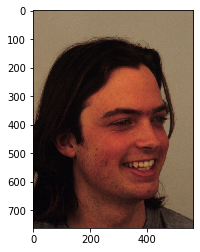

In [16]:
img = Image.open(base_dir+train_data[index_disp])
plt.imshow(img)
plt.show()

In [17]:
data_dir = 'data/'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

label_range = np.unique(train_label)

# training data dictionary
train_dir = os.path.join(data_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    for i in label_range:
        train_i_dir = os.path.join(train_dir, str(i))
        if not os.path.exists(train_i_dir):
            os.mkdir(train_i_dir)
            
# test data dictionary
test_dir = os.path.join(data_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    for i in label_range:
        test_i_dir = os.path.join(test_dir, str(i))
        if not os.path.exists(test_i_dir):
            os.mkdir(test_i_dir)
            
# validation data dictionary
validation_dir = os.path.join(data_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    for i in label_range:
        validation_i_dir = os.path.join(validation_dir, str(i))
        if not os.path.exists(validation_i_dir):
            os.mkdir(validation_i_dir)    

In [18]:
import shutil

#Copy Training data
for path, expression in zip(train_data, train_label):
    file = path.split('/')[1]
    src = os.path.join(base_dir,path)
    dst = os.path.join(train_dir, str(expression), file)
    shutil.copyfile(src, dst)

print("Training data copied")

#Copy Testing data
for path, expression in zip(test_data, test_label):
    file = path.split("/")[1]
    src = os.path.join(base_dir, path)
    dst = os.path.join(test_dir, str(expression), file)
    shutil.copyfile(src, dst)
    
print("Test data copied")

#Copy Validation data
for path, expression in zip(validation_data, validation_label):
    file = path.split("/")[1]
    src = os.path.join(base_dir, path)
    dst = os.path.join(validation_dir, str(expression), file)
    shutil.copyfile(src, dst)
print("Validation data copied")


Training data copied
Test data copied
Validation data copied
